In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
# data source: https://www.kaggle.com/datasets/kirbysasuke/drinking-water/data
df = pd.read_csv("MicroplasticsProject/microplastics.csv")
# let's check some metadata
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Columns: 115 entries, DOI to Approximate_Longitude
dtypes: float64(33), object(82)
memory usage: 545.5+ KB


In [42]:
# Light cleanup
# Dropping duplicates
df.drop_duplicates()
# Since we want to build a map, we'll drop data that is not associated with any location.
# Also drop data where concentration is not available as that is the parameter we'll be plotting.
df= df.dropna(subset = ['Location', 'Concentration'])
# Let's cleanup concentration values and convert them to float
df['Concentration'].dtype
df['Concentration'].unique()
# Let's drop concentration ranges
df= df[~df['Concentration'].str.contains('-')]
df= df[~df['Concentration'].str.contains('<')]
df['Concentration'] = pd.to_numeric(df['Concentration'], downcast = 'float')
df.shape

(427, 115)

In [3]:
# let's analyze tap water and bottled water separately
df_tap = df[df['Source'].isin(['tap water'])]
df_bottled = df[df['Source'].isin(['bottled water'])]

In [43]:
# To simplify, let's average by country as multiple readings are available
averages_tap = df_tap.groupby('Countries', as_index=False)['Concentration'].mean()
averages_bottled = df_bottled.groupby('Countries', as_index=False)['Concentration'].mean()

In [44]:
# Read geopandas world map
shape = gpd.read_file('MicroplasticsProject/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
# Let's drop Antarctica so that the map looks better
shape = shape[~shape['NAME'].isin(['Antarctica'])]

In [45]:
# Merge map data with microplastics concentration data
merged_data_tap = pd.merge(left = shape, right = averages_tap, left_on = 'NAME', right_on = 'Countries', how ='left')
merged_data_bottled = pd.merge(left = shape, right = averages_bottled, left_on = 'NAME', right_on = 'Countries', how ='left')

(-198.0, 198.00000000000006, -62.574678, 90.607978)

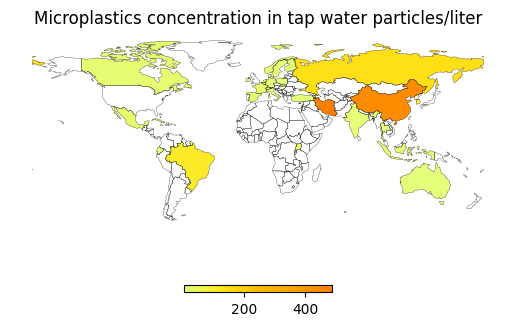

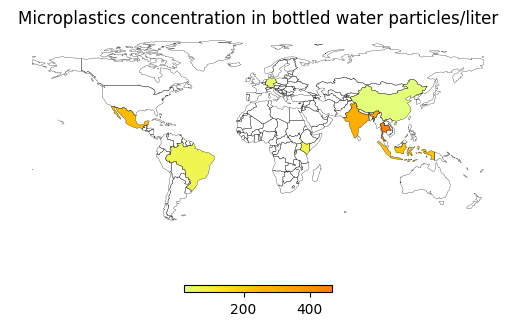

In [53]:
ax_tap = merged_data_tap.boundary.plot(edgecolor ='black', linewidth =0.2)
ax_bottled = merged_data_bottled.boundary.plot(edgecolor ='black', linewidth =0.2)
ax_tap.set_title('Microplastics concentration in tap water particles/liter')
ax_bottled.set_title('Microplastics concentration in bottled water particles/liter')

merged_data_tap.plot(ax=ax_tap,column = 'Concentration',legend = True, cmap ='Wistia', legend_kwds = {'shrink': 0.3, 'orientation': 'horizontal'}).axis('off')
merged_data_bottled.plot(ax=ax_bottled,column = 'Concentration',legend = True, cmap ='Wistia', legend_kwds = {'shrink': 0.3, 'orientation': 'horizontal'}).axis('off')